In [1]:
from numpy import *
from qiskit import *
from math import *
from numpy import *
import networkx as nx
import matplotlib.pyplot as plt
from qiskit.visualization import plot_histogram, array_to_latex
from qiskit.circuit.library import QFT
from random import randint

In [2]:
def controlled_unitary(qc, qubits: list, phases: list): # x,y,z = Specific Qubit; a,b,c,d = Phases
    qc.cp(phases[2]-phases[0], qubits[0], qubits[1]) # controlled-U1(c-a)
    qc.p(phases[0], qubits[0]) # U1(a)
    qc.cp(phases[1]-phases[0], qubits[0], qubits[2]) # controlled-U1(b-a)
    
    # controlled controlled U1(d-c+a-b)
    qc.cp((phases[3]-phases[2]+phases[0]-phases[1])/2, qubits[1], qubits[2])
    qc.cx(qubits[0], qubits[1])
    qc.cp(-(phases[3]-phases[2]+phases[0]-phases[1])/2, qubits[1], qubits[2])
    qc.cx(qubits[0], qubits[1])
    qc.cp((phases[3]-phases[2]+phases[0]-phases[1])/2, qubits[0], qubits[2])

def U(times, qc, unit, eigen, phases: list): # a,b,c = phases for U1; d,e,f = phases for U2; g,h,i = phases for U3; j,k,l = phases for U4; m_list=[m, n, o, p, q, r, s, t, u, a, b, c, d, e, f, g, h, i, j, k, l]
    controlled_unitary(qc, [unit[0]]+eigen[0:2], [0]+phases[0:3])
    controlled_unitary(qc, [unit[0]]+eigen[2:4], [phases[3]]+[0]+phases[4:6])
    controlled_unitary(qc, [unit[0]]+eigen[4:6], phases[6:8]+[0]+[phases[8]])
    controlled_unitary(qc, [unit[0]]+eigen[6:8], phases[9:12]+[0])
    
def final_U(times, eigen, phases: list):
    unit = QuantumRegister(1, 'unit')
    qc = QuantumCircuit(unit, eigen)
    for _ in range(2**times):
        U(times, qc, unit, eigen, phases)
    return qc.to_gate(label='U'+'_'+(str(2**times)))

# Storing the eigenvalues in a list
eigen_values = ["11000110", "10001101", "01001011"]
#index 0 is 1-2-3-4-1
#index 1 is 1-4-2-3-1
#index 2 is 1-3-4-2-1

def which_eigen(index):
    if index == 0:
        return "1-2-3-4-1"
    elif index == 1:
        return "1-4-2-3-1"
    else:
        return "1-3-4-2-1"

# Function to place appropriate corresponding gate according to eigenstates
def eigenstates(qc, eigen_list, index):
    for i in range(0, len(eigen_list)):
        if eigen_values[index][i] == '1':
            qc.x(eigen_list[i])
        if eigen_values[index][i] == '0':
            pass
    print("Chosen Eigen value is:", eigen_values[index], "which is", which_eigen(index))
    return qc

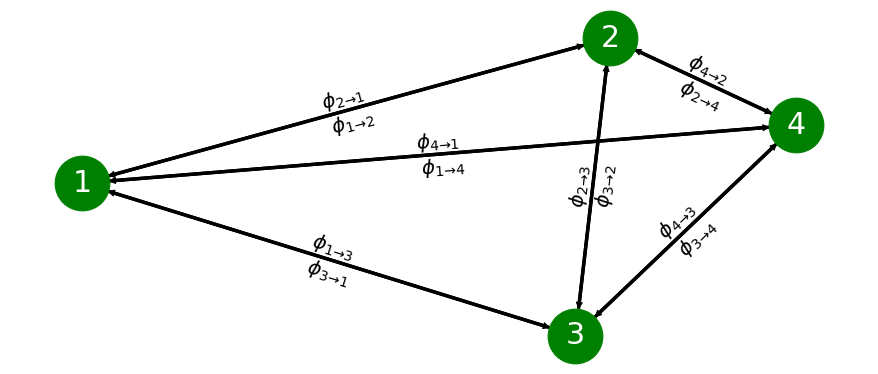

In [3]:
#positioning the four cities
ax = randint(1,1000)
ay = randint(1,1000)
bx = randint(1,1000)
by = randint(1,1000)
cx = randint(1,1000)
cy = randint(1,1000)
dx = randint(1,1000)
dy = randint(1,1000)

#Plotting the random TSP from above, for reference
F = nx.DiGraph(directed=True)

F.add_edge(1, 2)
F.add_edge(1, 3)
F.add_edge(1, 4)

F.add_edge(2, 1)
F.add_edge(2, 3)
F.add_edge(2, 4)

F.add_edge(3, 1)
F.add_edge(3, 2)
F.add_edge(3, 4)

F.add_edge(4, 1)
F.add_edge(4, 2)
F.add_edge(4, 3)


pos = {1: [ax, ay],
      2: [bx, by],
      3: [cx, cy],
      4: [dx, dy]}

edge_labels = {(1, 2): '$\\phi_{2\\to 1}$\n $\\phi_{1\\to 2}$',
              (1, 3): '$\\phi_{1\\to 3}$\n $\\phi_{3\\to 1}$',
              (1, 4): '$\\phi_{4\\to 1}$\n $\\phi_{1\\to 4}$',
              (2, 3): '$\\phi_{2\\to 3}$\n $\\phi_{3\\to 2}$',
              (2, 4): '$\\phi_{4\\to 2}$\n $\\phi_{2\\to 4}$',
              (3, 4): '$\\phi_{4\\to 3}$\n $\\phi_{3\\to 4}$'
              }

fig = plt.figure(1, figsize=(12, 5)) 
nx.draw(F, with_labels=True, node_color='green', pos=pos, node_size=3000, arrowsize=12, arrowstyle='simple', font_size=30, font_color = 'white')

nx.draw_networkx_edge_labels(F, pos, edge_labels=edge_labels, font_size=20, bbox=dict(alpha=0))
 
plt.show()

In [4]:
#Finding all of the distances
two_one = sqrt(((bx-ax)**2)+((by-ay)**2))
three_one = sqrt(((cx-ax)**2)+((cy-ay)**2))
four_one = sqrt(((dx-ax)**2)+((dy-ay)**2))
one_two = sqrt(((ax-bx)**2)+((ay-by)**2))
three_two = sqrt(((cx-bx)**2)+((cy-by)**2))
four_two = sqrt(((dx-bx)**2)+((dy-by)**2))
one_three = sqrt(((ax-cx)**2)+((ay-cy)**2))
two_three = sqrt(((bx-cx)**2)+((by-cy)**2))
four_three = sqrt(((dx-cx)**2)+((dy-cy)**2))
one_four = sqrt(((ax-dx)**2)+((ay-dy)**2))
two_four = sqrt(((bx-dx)**2)+((by-dy)**2))
three_four = sqrt(((cx-dx)**2)+((cy-dy)**2))
#
#Putting them all in a list to find the least value
ph_list = [two_one, three_one, four_one, one_two, three_two, four_two, one_three, two_three, four_three, one_four, two_four, three_four]
smallest_distance = min(ph_list)

In [5]:
#Initializing the values for the array
x = (smallest_distance*pi)/2
print(x)
phases = [(1/ph_list[0])*x, (1/ph_list[1])*x, (1/ph_list[2])*x, (1/ph_list[3])*x, (1/ph_list[4])*x, (1/ph_list[5])*x, (1/ph_list[6])*x, (1/ph_list[7])*x, (1/ph_list[8])*x, (1/ph_list[9])*x, (1/ph_list[10])*x, (1/ph_list[11])*x]
print(phases)

398.45316386875845
[0.6120437356677466, 0.6451272358763246, 0.47846754161526334, 0.6120437356677466, 0.8723567077233944, 1.5707963267948966, 0.6451272358763246, 0.8723567077233944, 0.9686155442437758, 0.47846754161526334, 1.5707963267948966, 0.9686155442437758]


Chosen Eigen value is: 11000110 which is 1-2-3-4-1


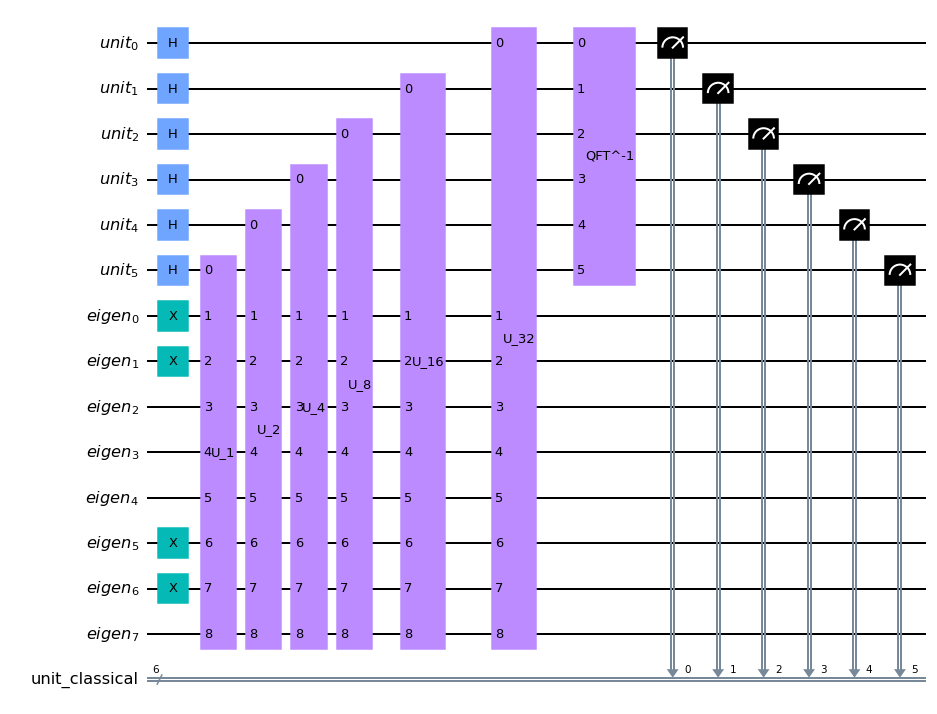

In [6]:
##############INDEX 0##########################
# Creating the 14 qubit circuit, 6 are for the qft and the rest are for the eigenvectors/QPE
unit = QuantumRegister(6, 'unit')
eigen = QuantumRegister(8, 'eigen')
unit_classical = ClassicalRegister(6, 'unit_classical')
qc = QuantumCircuit(unit, eigen, unit_classical)
#

# Setting one eigenstate, puts not gates into circuit  
eigenstates(qc, eigen, 0)
#

# Hadamard on the 'unit' qubits
qc.h(unit[:])
#

# Controlled Unitary  
for i in range(0, 6):
    qc.append(final_U(i, eigen, phases), [unit[5-i]] + eigen[:])
#

# Inverse QFT 
qft = QFT(num_qubits=len(unit), inverse=True, insert_barriers=False, do_swaps=False, name='QFT^-1')
qc.append(qft, qc.qubits[:len(unit)])
#

# Measure
qc.measure(unit, unit_classical)
#

# Draw
qc.draw('mpl')



Chosen Eigen value is: 10001101 which is 1-4-2-3-1


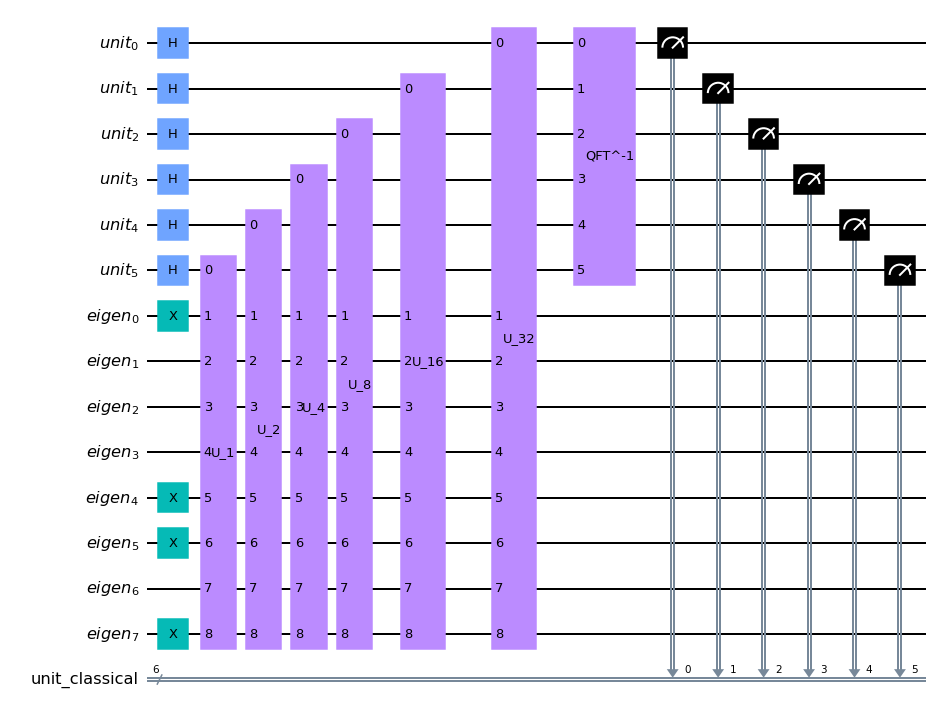

In [7]:
##############INDEX 1##########################
# Creating the 14 qubit circuit, 6 are for the qft and the rest are for the eigenvectors/QPE
unit = QuantumRegister(6, 'unit')
eigen = QuantumRegister(8, 'eigen')
unit_classical = ClassicalRegister(6, 'unit_classical')
qc1 = QuantumCircuit(unit, eigen, unit_classical)
#

# Setting one eigenstate, puts not gates into circuit  
eigenstates(qc1, eigen, 1)
#

# Hadamard on the 'unit' qubits
qc1.h(unit[:])
#

# Controlled Unitary  
for i in range(0, 6):
    qc1.append(final_U(i, eigen, phases), [unit[5-i]] + eigen[:])
#

# Inverse QFT 
qft = QFT(num_qubits=len(unit), inverse=True, insert_barriers=False, do_swaps=False, name='QFT^-1')
qc1.append(qft, qc1.qubits[:len(unit)])
#

# Measure
qc1.measure(unit, unit_classical)
#

# Draw
qc1.draw('mpl')

Chosen Eigen value is: 01001011 which is 1-3-4-2-1


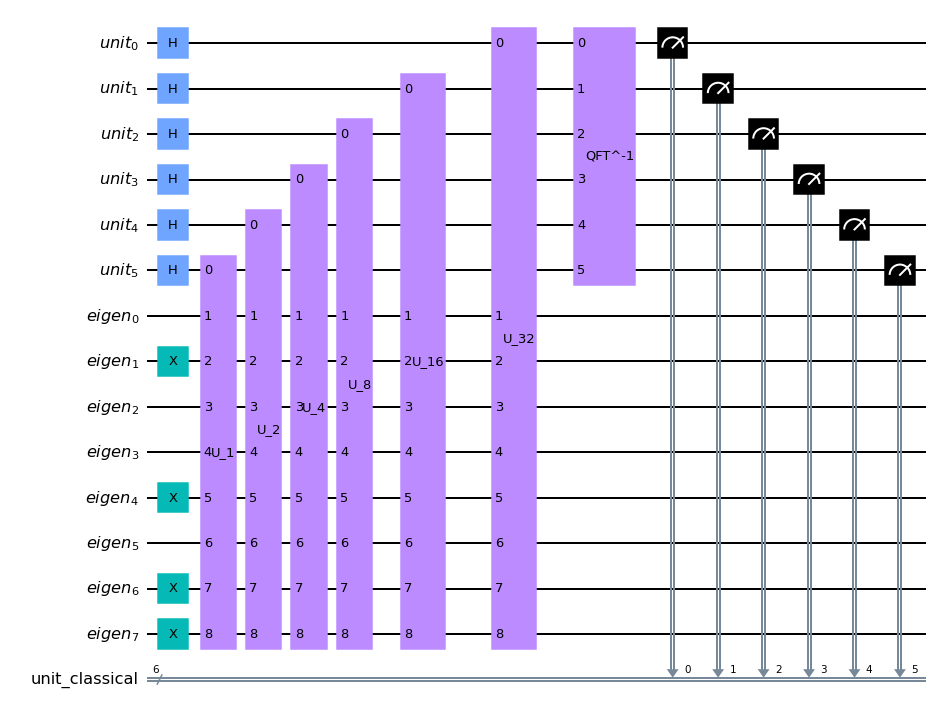

In [8]:
##############INDEX 2##########################
# Creating the 14 qubit circuit, 6 are for the qft and the rest are for the eigenvectors/QPE
unit = QuantumRegister(6, 'unit')
eigen = QuantumRegister(8, 'eigen')
unit_classical = ClassicalRegister(6, 'unit_classical')
qc2 = QuantumCircuit(unit, eigen, unit_classical)
#

# Setting one eigenstate, puts not gates into circuit  
eigenstates(qc2, eigen, 2)
#

# Hadamard on the 'unit' qubits
qc2.h(unit[:])
#

# Controlled Unitary  
for i in range(0, 6):
    qc2.append(final_U(i, eigen, phases), [unit[5-i]] + eigen[:])
#

# Inverse QFT 
qft = QFT(num_qubits=len(unit), inverse=True, insert_barriers=False, do_swaps=False, name='QFT^-1')
qc2.append(qft, qc2.qubits[:len(unit)])
#

# Measure
qc2.measure(unit, unit_classical)
#

# Draw
qc2.draw('mpl')

In [9]:
#Running one of the circuits at a time
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=8192)
count = job.result().get_counts()
print(count)
plot_histogram(count)
print("The most frequent output is:", count.most_frequent(), "which is equal to phi(ij)")

{'010100': 1, '010101': 1, '100110': 2, '110101': 1, '100111': 3, '001111': 1, '000011': 1, '101001': 1, '101100': 3, '011010': 5, '010111': 1, '010110': 2, '100011': 11, '011100': 34, '101000': 1, '001010': 1, '011110': 7690, '100000': 34, '010011': 2, '001110': 2, '100101': 1, '100010': 8, '101010': 1, '011001': 8, '010000': 2, '100001': 12, '011000': 3, '100100': 5, '011111': 119, '000110': 1, '011101': 212, '011011': 23}
The most frequent output is: 011110 which is equal to phi(ij)


In [10]:
#Running all six at once
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1000)
job1 = execute(qc1, backend, shots=1000)
job2 = execute(qc2, backend, shots=1000)
count = job.result().get_counts()
count1 = job1.result().get_counts()
count2 = job2.result().get_counts()
counts_list = [count.most_frequent(), count1.most_frequent(), count2.most_frequent()]
print("The most frequent output for", eigen_values[0], "aka", which_eigen(0), "\b, is", counts_list[0])
print("The most frequent output for", eigen_values[1], "aka", which_eigen(1), "\b, is", counts_list[1])
print("The most frequent output for", eigen_values[2], "aka", which_eigen(2), "\b, is", counts_list[2])
#
int_counts_list =[]
for i in range(3):
    int_counts_list.append(int(counts_list[i], 2))
print(int_counts_list)
maximum = max(int_counts_list)
maximum_indices = []
for i in range(3):
    if int_counts_list[i] == maximum:
        maximum_indices.append(which_eigen(i))
print("The maximum returned value, which is equivalent to the shortest distance, is", maximum, "and the corresponding path is:", maximum_indices)
#calculate the miles 
print()
print("The actual distances are:")
print("1-2-3-4-1 = ", two_one + three_two + four_three+one_four ,"km")
print("1-4-2-3-1 = ", three_one + four_three + two_four + one_four ,"km")
print("1-3-2-4-1 = ", one_four + two_four + three_two +one_three,"km")

The most frequent output for 11000110 aka 1-2-3-4-1 , is 011110
The most frequent output for 10001101 aka 1-4-2-3-1 , is 100111
The most frequent output for 01001011 aka 1-3-4-2-1 , is 001100
[30, 39, 12]
The maximum returned value, which is equivalent to the shortest distance, is 39 and the corresponding path is: ['1-4-2-3-1']

The actual distances are:
1-2-3-4-1 =  2351.908656704445 km
1-4-2-3-1 =  2115.431230009066 km
1-3-2-4-1 =  2160.822501535821 km


In [11]:
print(dict(qc.count_ops()))
from collections import defaultdict
counts = defaultdict(int)

for inst in qc.data:
     counts[len(inst[1])]
print(counts)

{'h': 6, 'measure': 6, 'x': 4, 'circuit-1': 1, 'circuit-4': 1, 'circuit-7': 1, 'circuit-10': 1, 'circuit-13': 1, 'circuit-16': 1, 'QFT^-1': 1}
defaultdict(<class 'int'>, {1: 0, 9: 0, 6: 0})


In [12]:
#ALERT, DO NOT RUN THIS CODE BLOCK UNLESS ABSOLUTELY NECESSARY
#qc_list = [qc, qc1, qc2, qc3, qc4, qc5]
#On ibmq kolkata
#IBMQ.load_account()
#provider = IBMQ.get_provider(hub='ibm-q-ornl', group='ornl', project='csc494')
#provider.backends()
#backend = provider.get_backend('ibmq_kolkata')
#job = execute(qc_list, backend)
#print(job.job_id())
#job = backend.retrieve_job(job.job_id()) 
#import matplotlib.pyplot as plt
#plt.style.use('dark_background')
#plot_histogram(job.result().get_counts())

In [13]:
#print(qc.qasm())